In [1]:
source('../../source/basic.r')

source('../validataion.r')


Warning message:
“no function found corresponding to methods exports from ‘BSgenome’ for: ‘releaseName’”


In [2]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(Signac)
    library(Seurat)
    library(GenomeInfoDb)
    library(EnsDb.Hsapiens.v86 )# hg38
   # library(EnsDb.Hsapiens.v75) #hg19
    library(ggplot2)
    library(patchwork)
    library(data.table)
    library(Matrix)
    set.seed(1234)
})

# Metadata

In [3]:
metadata.all <- fread('data/tumor_metadata_Full_Cohort.tsv')

In [4]:
metadata.all%>%dim

[1] 74621    20

In [5]:
metadata.rna <- fread('data/tumor_metadata_Full_Cohort_mmc3.tsv')#%>%dplyr::filter(CNV.Pos==TRUE)

# read qs

In [6]:
res.peaks <- qread('rds/peaks/3BAE2L.qs')

seurat.peak.rna <- res.peaks$seurat.object$rna
seurat.peak.atac <- res.peaks$seurat.object$atac

In [9]:
res.cpeaks <- qread('rds/cpeaks/3BAE2L.qs')

seurat.cpeak.rna <- res.cpeaks$seurat.object$rna
seurat.cpeak.atac <- res.cpeaks$seurat.object$atac

## intra two OC clusters

In [7]:
da_OC_intra=qread('p8.da_OC_intra.qs')

In [102]:
da_OC_intra.peak = qread('p8.da_OC_inter.peak.qs')

In [20]:
DefaultAssay(seurat.cpeak.atac) <- 'peaks'

In [42]:
DefaultAssay(seurat.peak.atac) <- 'peaks'

In [21]:
regions.oc.intra <- rownames(da_OC_intra%>%dplyr::filter(p_val_adj<0.05))

closest_genes.oc.intra <- ClosestFeature(seurat.cpeak.atac, regions = regions.oc.intra)


Warning message:
"Removed 70 rows containing missing values (`geom_segment()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_segment()`)."


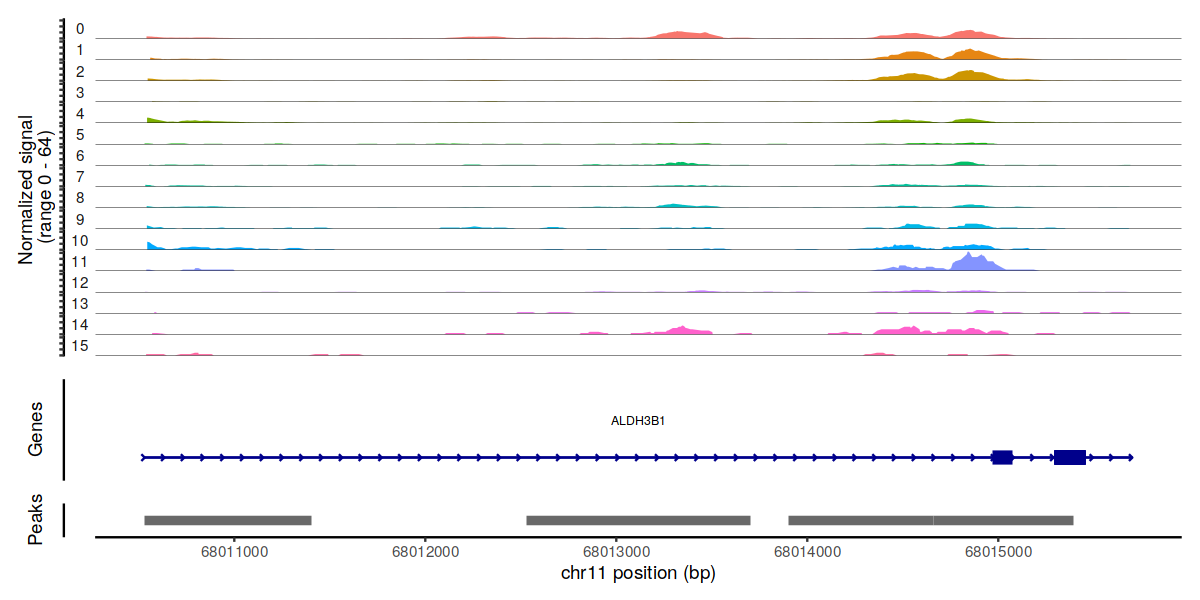

In [50]:
# set plotting order
#levels(seurat.object) <- c("CD4 Naive","CD4 Memory","CD8 Naive","CD8 Effector","DN T","NK CD56bright","NK CD56Dim","pre-B",'pro-B',"pDC","DC","CD14 Mono",'CD16 Mono')

CoveragePlot(
  object = seurat.cpeak.atac,
  region = rownames(da_OC_intra)[1],
  extend.upstream = 2000,
  extend.downstream = 2000
)

In [23]:
psize(10,5)

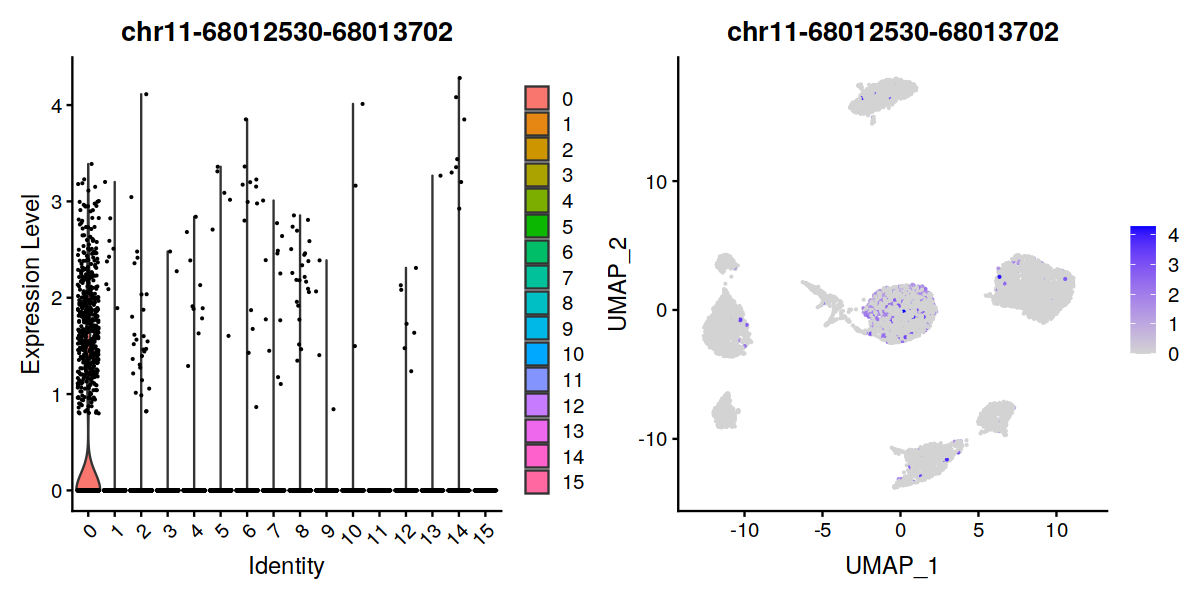

In [24]:
plot1.pda <- VlnPlot(
  object = seurat.cpeak.atac,
  features = rownames(da_OC_intra)[1],
  pt.size = 0.1
)
plot2.pda <- FeaturePlot(
  object = seurat.cpeak.atac,
  features = rownames(da_OC_intra)[1],
  pt.size = 0.1
)

plot1.pda | plot2.pda

In [29]:
da_OC_intra%>%head

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11-68012530-68013702,9.182360e-144,-4.132432,0.016,0.295,1.440541e-137
chr19-10717275-10718302,4.830949e-113,1.332543,0.602,0.421,7.578860e-107
chr4-189001752-189002821,4.463507e-101,-5.772368,0.002,0.178,7.002412e-95
chr19-10808767-10810450,1.376572e-97,2.614620,0.302,0.072,2.159586e-91
chr8-113046319-113047195,2.564907e-91,-4.534503,0.009,0.180,4.023862e-85
chr5-1554282-1556738,2.631176e-90,-2.778956,0.040,0.270,4.127826e-84


In [30]:
psize(10,10)

Warning message:
"Removed 158 rows containing missing values (`geom_segment()`)."


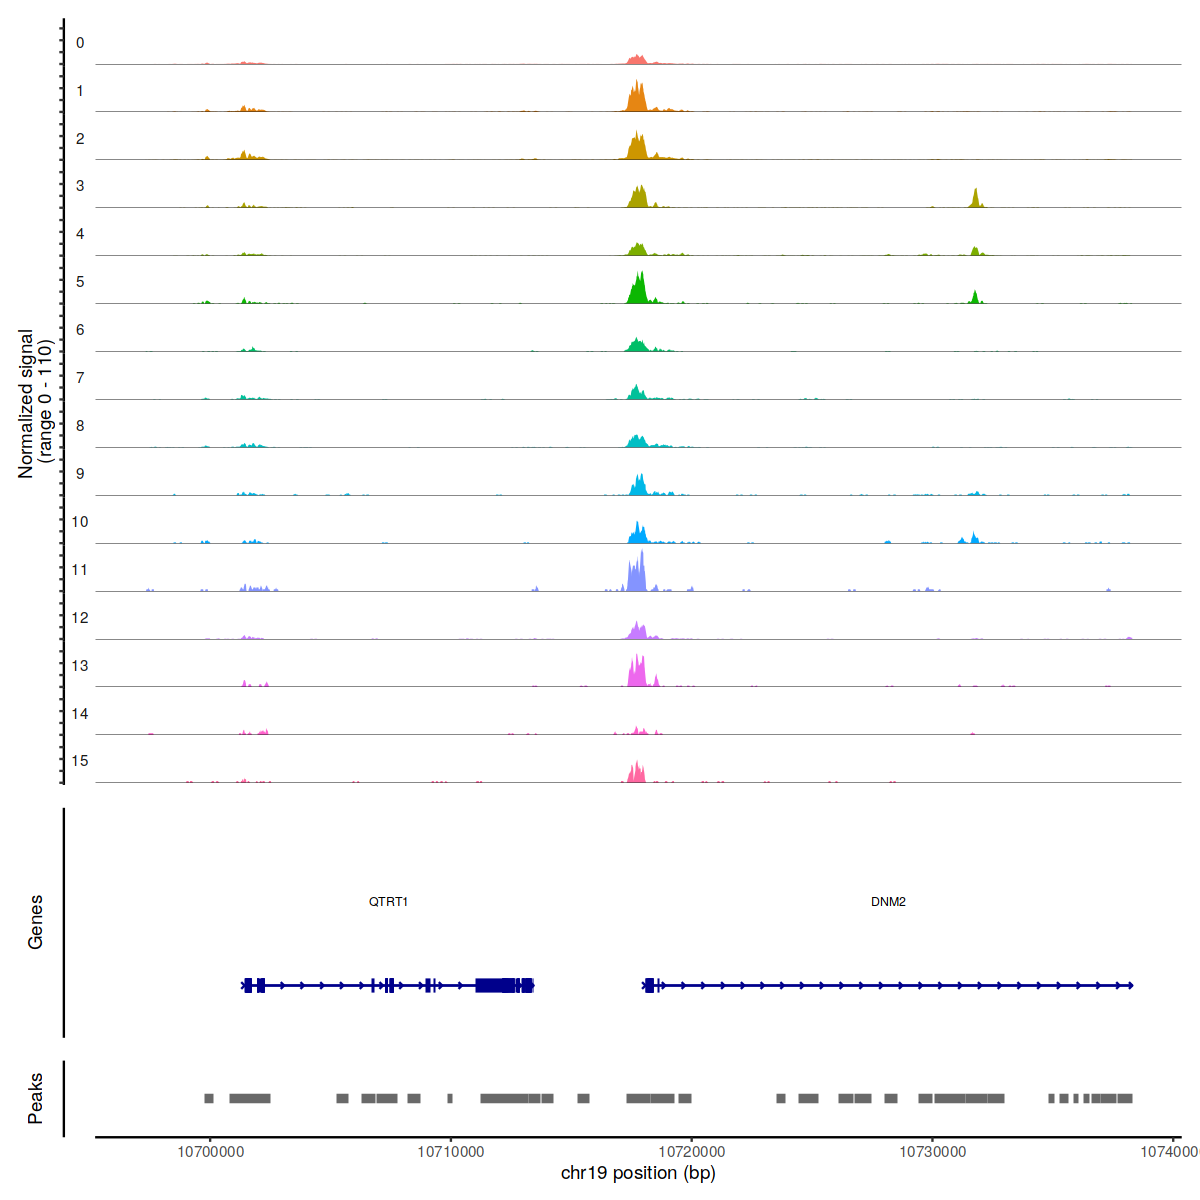

In [31]:
# set plotting order
#levels(seurat.object) <- c("CD4 Naive","CD4 Memory","CD8 Naive","CD8 Effector","DN T","NK CD56bright","NK CD56Dim","pre-B",'pro-B',"pDC","DC","CD14 Mono",'CD16 Mono')

CoveragePlot(
  object = seurat.cpeak.atac,
  region = rownames(da_OC_intra)[2], #chr6-157713769-157717708
  extend.upstream = 20000,
  extend.downstream = 20000
)

In [32]:
psize(10,5)

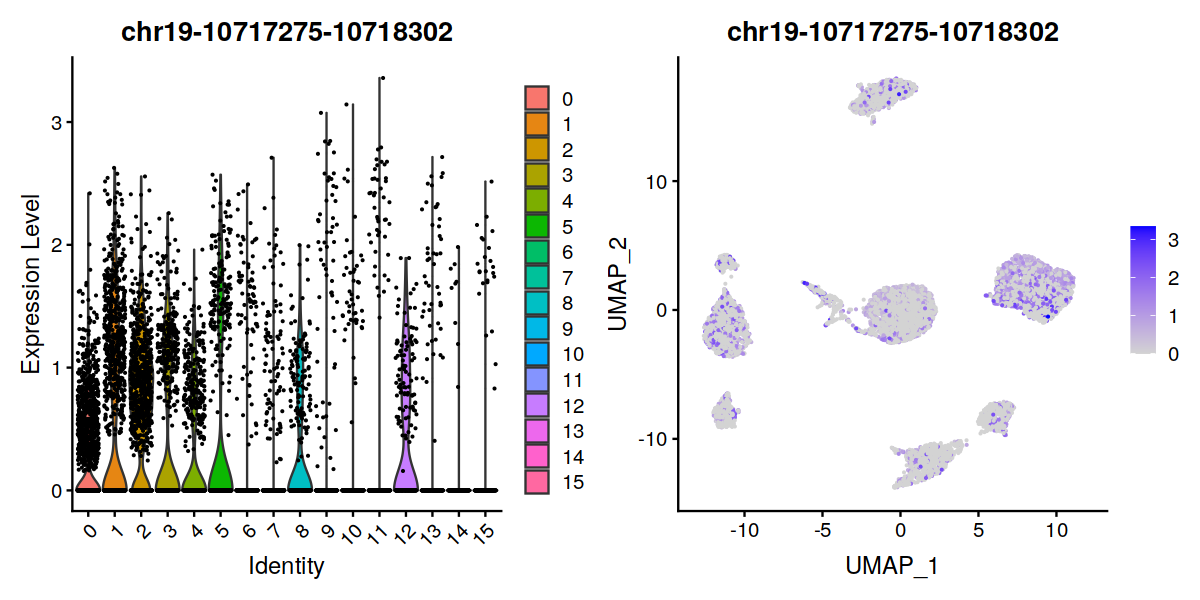

In [33]:
plot1.pda <- VlnPlot(
  object = seurat.cpeak.atac,
  features = rownames(da_OC_intra)[2],
  pt.size = 0.1
)
plot2.pda <- FeaturePlot(
  object = seurat.cpeak.atac,
  features = rownames(da_OC_intra)[2],
  pt.size = 0.1
)

plot1.pda | plot2.pda

In [38]:
da_OC_intra%>%dplyr::filter(pct.1<0.1|pct.2<0.1, pct.1>0.3|pct.2>0.3, p_val_adj<0.01)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr19-10808767-10810450,1.376572e-97,2.614620,0.302,0.072,2.159586e-91
chrX-48487140-48488911,9.374266e-86,-2.080334,0.084,0.352,1.470648e-79
chr7-63925053-63927326,3.140014e-81,-2.099858,0.075,0.342,4.926098e-75
chr22-23182383-23183096,3.973507e-70,-1.935625,0.082,0.320,6.233693e-64
chr22-25400588-25401453,5.669410e-65,-1.838197,0.089,0.314,8.894250e-59


In [74]:
a=(da_OC_intra%>%dplyr::filter( p_val_adj<0.01)%>%rownames)

In [103]:
b= da_OC_intra.peak%>%dplyr::filter( p_val_adj<0.01)%>%rownames
#seurat.peak.atac%>%rownames

In [104]:
a%>%length

[1] 9249

In [105]:
b%>%length

[1] 11548

In [106]:

regions1 = a%>%as.data.frame%>%rename_with(~c('region'))%>%mutate(chr=str_extract(region,'^[^-]+'),
                                           start=str_extract(region,'(?<=-)[^-]*(?=-)'),
                                           end=str_extract(region,'(?<=-)[^-]*$'))%>%
            mutate(start=as.numeric(start), 
                   end=as.numeric(end),
                   id=row_number())
regions2 = b%>%as.data.frame%>%rename_with(~c('region'))%>%mutate(chr=str_extract(region,'^[^-]+'),
                                               start=str_extract(region,'(?<=-)[^-]*(?=-)'),
                                               end=str_extract(region,'(?<=-)[^-]*$'))%>%
                mutate(start=as.numeric(start), 
                       end=as.numeric(end),
                       id=row_number())

source('../../map_to_cPeak_v1/map_function2.r')
res = fun_map_bed_customRef(regions1,regions2)
res.df=res$df.trans%>%mutate(regions1=paste0(chr,'-',start_q,'-',end_q),
                 regions2=paste0(chr,'-',start,'-',end))%>%dplyr::select(regions1,regions2)

15.4523379802704



In [107]:
res.df%>%pull(regions2)%>%unique%>%length

[1] 8209

In [110]:
res.df%>%pull(regions1)%>%unique%>%length

[1] 8604

In [108]:
da_OC_intra%>%dim

[1] 31878     5

In [109]:
tmp =da_OC_intra%>%dplyr::filter( p_val_adj<0.01)%>%rownames_to_column('regions1')%>%full_join(res.df,by='regions1')%>%
group_by(regions2)%>%dplyr::filter(n()>1)%>%arrange(regions2)

Warning message in full_join(., res.df, by = "regions1"):
"Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 362 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this warning."


In [120]:
res.join <- res.df%>%full_join(da_OC_intra%>%rownames_to_column('regions1'))%>%
full_join(da_OC_intra.peak%>%rownames_to_column('regions2'),by='regions2')

Joining with `by = join_by(regions1)`


In [125]:
psize()

In [129]:
res.join

regions1,regions2,p_val.x,avg_log2FC.x,pct.1.x,pct.2.x,p_val_adj.x,p_val.y,avg_log2FC.y,pct.1.y,pct.2.y,p_val_adj.y
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1-246946974-246948128,chr1-246946791-246948236,2.861375e-55,2.9145963,0.164,0.029,4.488966e-49,9.853330e-51,2.7592072,0.165,0.031,2.823255e-45
chr1-14913392-14914550,chr1-14912872-14914690,5.236868e-47,-2.0715644,0.048,0.201,8.215672e-41,2.910657e-44,-1.8770458,0.058,0.219,8.339847e-39
chr1-5404426-5405587,chr1-5404023-5405936,2.929145e-35,-2.1699365,0.031,0.145,4.595284e-29,4.372758e-42,-2.1114156,0.039,0.183,1.252918e-36
chr1-15028003-15028656,chr1-15027454-15029062,4.116058e-38,-1.1704419,0.154,0.350,6.457330e-32,8.959154e-40,-1.0880088,0.187,0.403,2.567049e-34
chr1-116775056-116775637,chr1-116775017-116775777,1.334742e-35,-2.5981414,0.020,0.116,2.093961e-29,1.597628e-37,-2.6627645,0.019,0.121,4.577653e-32
chr1-85571839-85572310,chr1-85571411-85572385,1.539340e-37,-2.1192423,0.035,0.160,2.414938e-31,4.087869e-34,-1.9175690,0.041,0.169,1.171289e-28
chr1-14776381-14777236,chr1-14776365-14778252,1.053349e-20,-1.1006785,0.099,0.216,1.652508e-14,3.270077e-33,-1.2705829,0.115,0.278,9.369688e-28
chr1-226001943-226002696,chr1-226001884-226003226,2.225860e-25,-1.6359710,0.048,0.153,3.491960e-19,7.360731e-32,-1.4342929,0.082,0.237,2.109055e-26
chr1-226002696-226003240,chr1-226001884-226003226,1.511973e-13,-1.2029660,0.052,0.126,2.372004e-07,7.360731e-32,-1.4342929,0.082,0.237,2.109055e-26


Warning message:
"Removed 47154 rows containing missing values (`geom_point()`)."


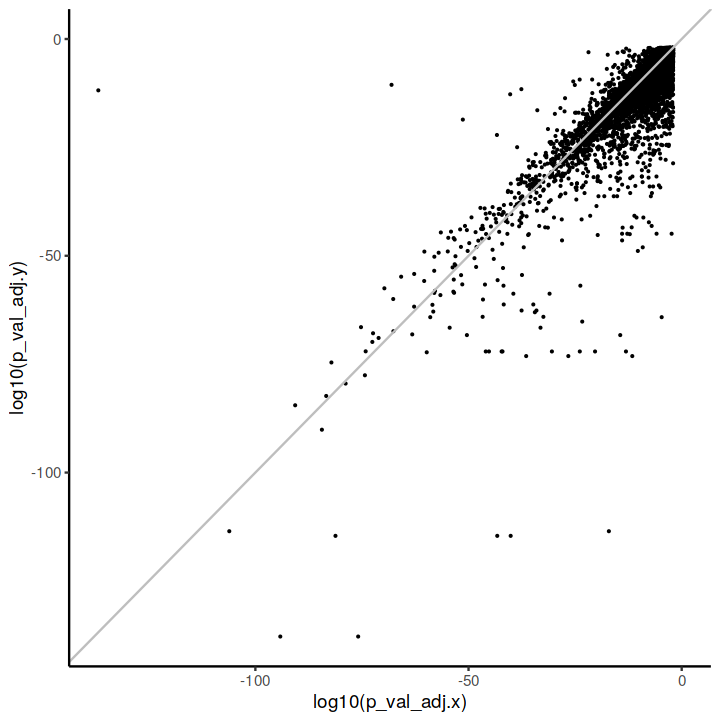

In [128]:
res.join%>%ggplot(aes(x=log10(p_val_adj.x),y=log10(p_val_adj.y)))+geom_point(cex=0.1)+theme_classic()+
geom_abline(slope = 1, intercept = 0,color='grey')

In [114]:
tmp%>%group_by(regions2)%>%mutate(m=max(avg_log2FC)-min(avg_log2FC),
                                     avg = mean(avg_log2FC+avg_log2FC),
                                     ratio=m/avg,
                                     m2=(max(avg_log2FC)*min(avg_log2FC)))%>%
arrange(desc(abs(ratio)))%>%dplyr::filter(!is.na(regions2))

regions1,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,regions2,m,avg,ratio,m2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr5-172766141-172767256,6.969142e-28,-2.3443945,0.020,0.107,1.093329e-21,chr5-172764896-172774160,1.6413565,-3.047432,-0.5386031,1.6481984
chr5-172764520-172766141,4.362887e-12,-0.7030380,0.150,0.270,6.844559e-06,chr5-172764896-172774160,1.6413565,-3.047432,-0.5386031,1.6481984
chr8-102808002-102808810,1.149159e-14,-1.3713154,0.040,0.116,1.802817e-08,chr8-102804625-102809245,0.8614693,-1.881162,-0.4579454,0.6991598
chr8-102805931-102807300,3.500150e-09,-0.5098461,0.216,0.334,5.491084e-03,chr8-102804625-102809245,0.8614693,-1.881162,-0.4579454,0.6991598
chr20-45911602-45912482,4.533222e-16,-1.4370447,0.040,0.112,7.111782e-10,chr20-45910416-45912978,0.8431027,-2.030987,-0.4151197,0.8535213
chr20-45910512-45911602,1.064098e-10,-0.5939421,0.185,0.302,1.669371e-04,chr20-45910416-45912978,0.8431027,-2.030987,-0.4151197,0.8535213
chr17-16981264-16981720,1.914031e-20,1.7291226,0.109,0.040,3.002758e-14,chr17-16980654-16981794,0.9949126,2.463333,0.4038889,1.2695391
chr17-16980622-16981264,3.739461e-09,0.7342100,0.165,0.118,5.866518e-03,chr17-16980654-16981794,0.9949126,2.463333,0.4038889,1.2695391
chr4-81470314-81471280,6.204943e-15,-1.2811288,0.049,0.130,9.734402e-09,chr4-81469790-81474289,0.7224890,-1.839769,-0.3927064,0.7156896


In [99]:
psize(10,15)

Warning message:
"Removed 28 rows containing missing values (`geom_segment()`)."


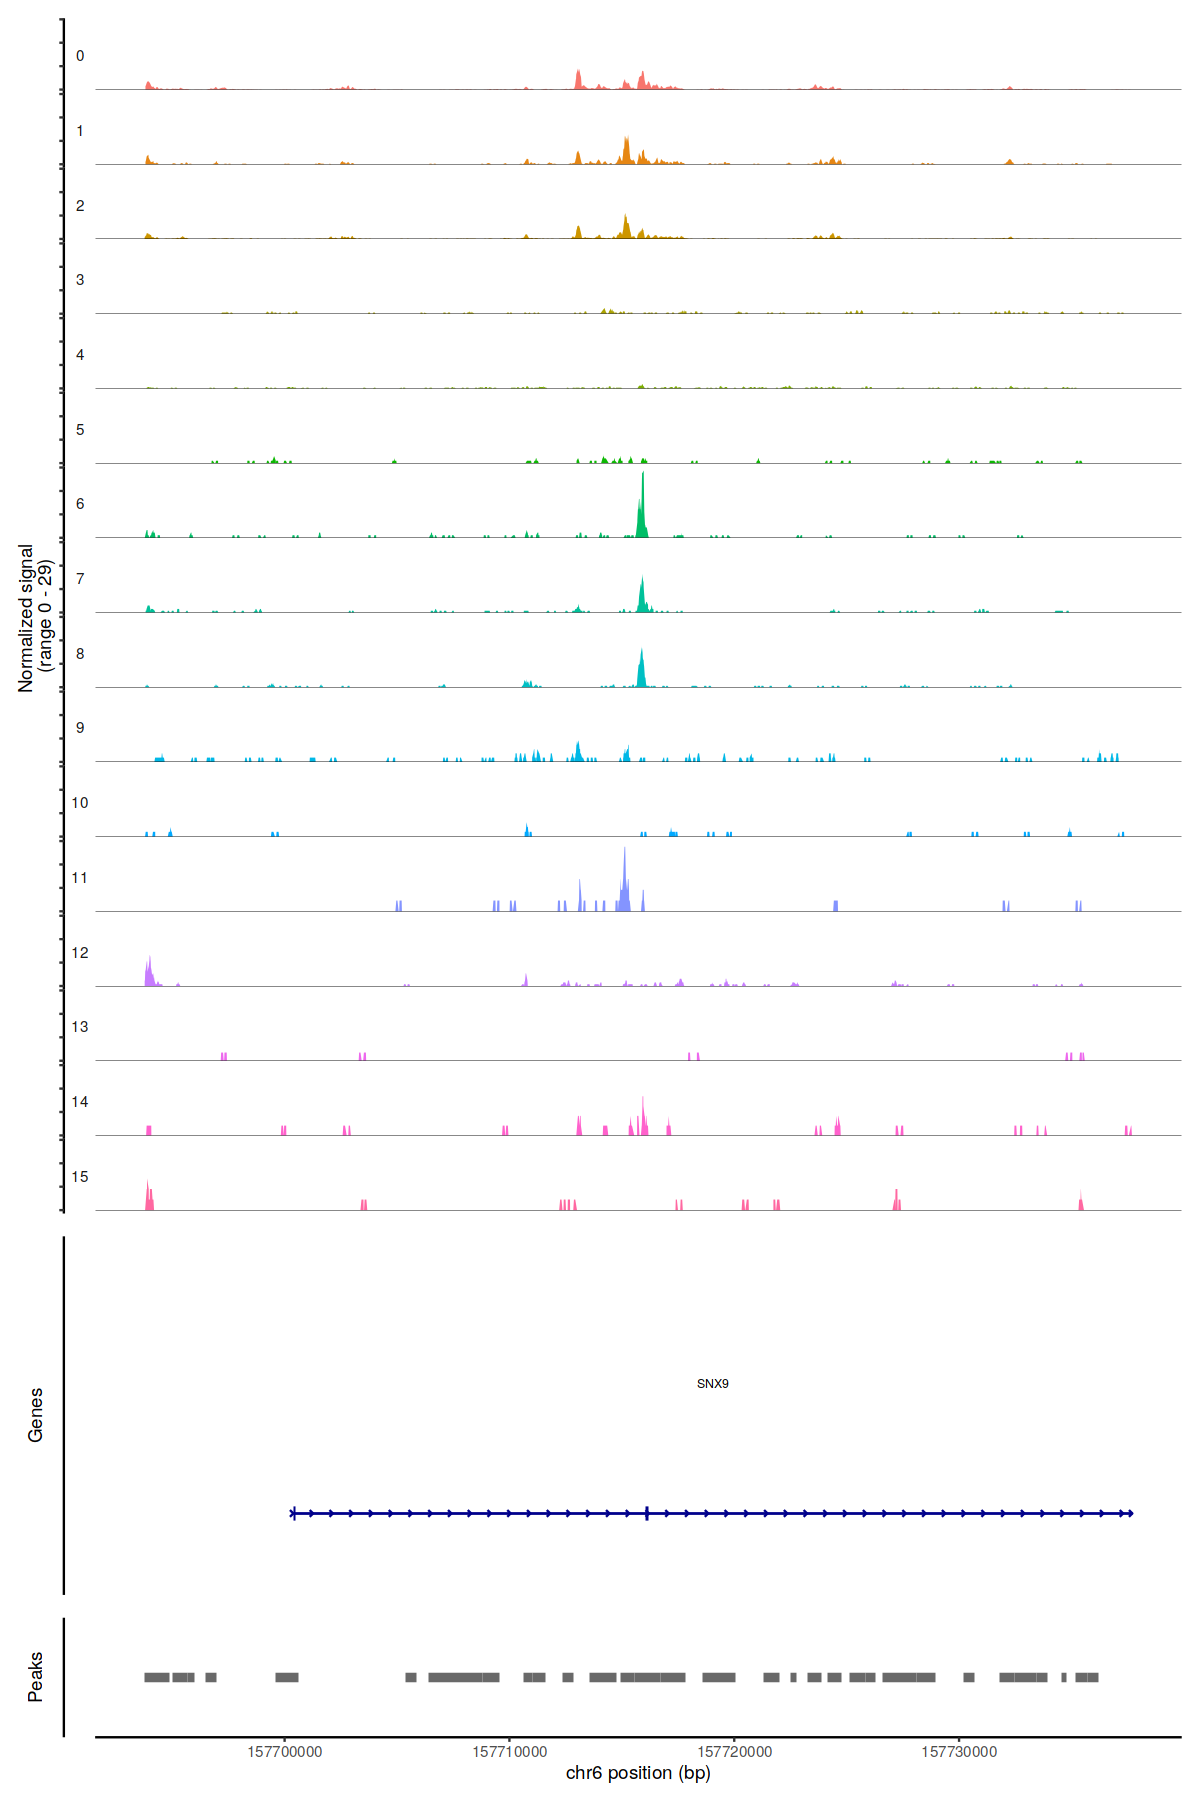

In [100]:
# set plotting order
#levels(seurat.object) <- c("CD4 Naive","CD4 Memory","CD8 Naive","CD8 Effector","DN T","NK CD56bright","NK CD56Dim","pre-B",'pro-B',"pDC","DC","CD14 Mono",'CD16 Mono')

CoveragePlot(
  object = seurat.cpeak.atac,
  region = 'chr6-157713769-157717708',
  extend.upstream = 20000,
  extend.downstream = 20000
)

## inter OC cluster

In [77]:
seurat.cpeak.atac@meta.data%>%pull(prediction.score.max)%>%median

[1] 0.9181696

In [78]:
seurat.peak.atac@meta.data%>%pull(prediction.score.max)%>%median

[1] 0.8946288

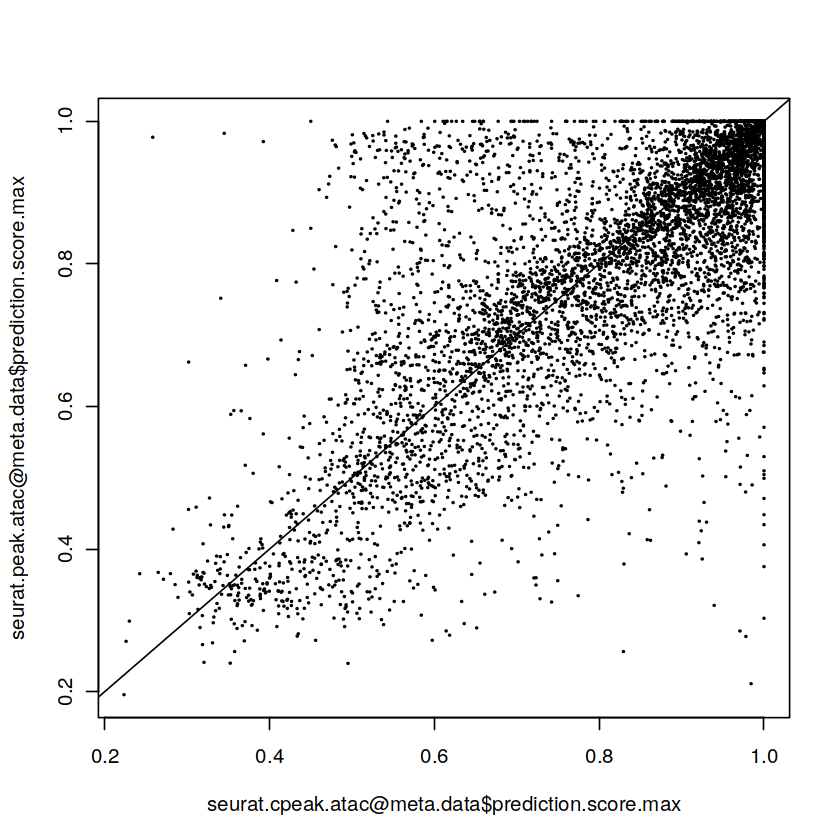

In [84]:
plot(seurat.cpeak.atac@meta.data$prediction.score.max,
     seurat.peak.atac@meta.data$prediction.score.max,cex=0.1)
abline(0,1)